/Users/atularavinddas/Documents/GitHub/US_Income_Maps/US_Income_Maps/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


  STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID       NAME LSAD  \
0      23      013  00581292  0500000US23013  23013       Knox   06   
1      23      015  00581293  0500000US23015  23015    Lincoln   06   
2      23      023  00581297  0500000US23023  23023  Sagadahoc   06   
3      23      031  00581301  0500000US23031  23031       York   06   
4      23      007  00581289  0500000US23007  23007   Franklin   06   

        ALAND      AWATER                                           geometry  
0   945684684  2017116243  MULTIPOLYGON (((-68.55926 44.04502, -68.55504 ...  
1  1180688991   631299424  MULTIPOLYGON (((-69.32357 43.75899, -69.32114 ...  
2   657782155   300590924  MULTIPOLYGON (((-69.76031 43.71044, -69.75904 ...  
3  2566813705   721723982  MULTIPOLYGON (((-70.61725 42.99202, -70.61467 ...  
4  4395259492   121300480  POLYGON ((-70.83554 45.2938, -70.82755 45.2966...  


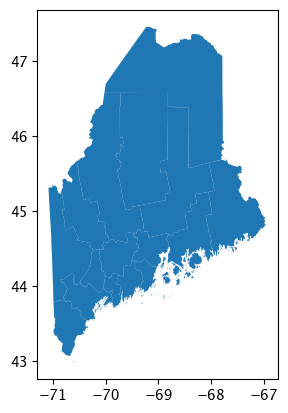

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import warnings
import pandas as pd
import os

counties = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_500k.zip')

me_counties = counties[counties['STATEFP'] == '23']




os.makedirs('.../me_county_shapefiles', exist_ok=True)
me_counties.to_file('.../me_county_shapefiles/me_counties.shp')

me_counties = gpd.read_file('../me_county_shapefiles/me_counties.shp')


print(me_counties.head())

me_counties.plot()
plt.show()

# Generate the map for Maine Counties

In [2]:
me_parameters=pd.read_csv("../New_England_Datasets/NEW ENGLAND's data (states) - ME.csv")
me_parameters

,COUNTY,Population,Income (per capita),Education \n(high school or higher attendance rate),Health (life expectancy),Crime rate (per population)
0,ANDROSCOGGIN,"113,765","$33,560",91.20%,75.0,0.0727
1,AROOSTOOK,"67,351","$35,284",91.20%,75.0,0.0364
2,CUMBERLAND,"310,230","$54,279",97.20%,79.5,0.1640
3,FRANKLIN,"30,145","$34,456",93.80%,76.2,0.0545
4,HANCOCK,"56,084","$41,576",95.00%,78.1,0.0182
5,KENNEBEC,"127,259","$35,971",94.70%,76.1,0.1640
6,KNOX,"40,860","$42,729",94.30%,78.9,0.0909
7,LINCOLN,"35,840","$44,739",94.90%,78.9,0.0545
8,OXFORD,"58,728","$33,545",92.60%,76.1,0.0364
9,PENOBSCOT,"155,312","$37,775",94.20%,75.2,0.0727


In [3]:
me_counties['NAME']=me_counties['NAME'].str.upper()


In [4]:
me_counties['Population'] = me_parameters['Population'].str.replace(',', '').astype(float)
me_counties['Income'] = me_parameters['Income (per capita)'].str.replace('$', '').str.replace(',', '').astype(float)
me_counties['Education']=me_parameters['Education \n(high school or higher attendance rate)'].str.replace('%', '').astype(float)
me_counties['Health']=me_parameters['Health (life expectancy)']
me_counties['Crime Rate']=me_parameters['Crime rate (per population)']

me_counties['Income'] = pd.to_numeric(me_counties['Income'], errors='coerce')
me_counties['Education'] = pd.to_numeric(me_counties['Education'], errors='coerce')
me_counties['Health'] = pd.to_numeric(me_counties['Health'], errors='coerce')
me_counties['Crime Rate'] = pd.to_numeric(me_counties['Crime Rate'], errors='coerce')
me_counties['Population'] = pd.to_numeric(me_counties['Population'], errors='coerce')



In [5]:
me_counties = me_counties.dissolve(by='NAME', aggfunc='first').reset_index()




me_counties = me_counties.to_crs(epsg=4326)

m = folium.Map(location=[44, -71], zoom_start=6)


# All your choropleth layers
folium.Choropleth(
    geo_data=me_counties,
    name='Income',
    data=me_counties,
    columns=['NAME', 'Income'],
    key_on='feature.properties.NAME',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Income per Capita ($)',
    overlay=True,
    show=True
).add_to(m)

folium.Choropleth(
    geo_data=me_counties,
    name='Education',
    data=me_counties,
    columns=['NAME', 'Education'],
    key_on='feature.properties.NAME',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Education (%)',
    overlay=True,
    show=False
).add_to(m)

folium.Choropleth(
    geo_data=me_counties,
    name='Healthcare',
    data=me_counties,
    columns=['NAME', 'Health'],
    key_on='feature.properties.NAME',
    fill_color='Purples',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Life Expectancy',
    overlay=True,
    show=False
).add_to(m)

folium.Choropleth(
    geo_data=me_counties,
    name='Crime Rate',
    data=me_counties,
    columns=['NAME', 'Crime Rate'],
    key_on='feature.properties.NAME',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Crime Rate',
    overlay=True,
    show=False
).add_to(m)

folium.Choropleth(
    geo_data=me_counties,
    name='Population',
    data=me_counties,
    columns=['NAME', 'Population'],
    key_on='feature.properties.NAME',
    fill_color='Oranges',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Population',
    overlay=True,
    show=False
).add_to(m)

# Create a feature group with higher z-index for tooltips
tooltip_layer = folium.FeatureGroup(name='State Info', overlay=True, control=True, show=True)

# Add GeoJson to the feature group
folium.GeoJson(
    me_counties,
    tooltip=folium.GeoJsonTooltip(
        fields=['NAME', 'Population', 'Income', 'Education', 'Health', 'Crime Rate'],
        aliases=['County:', 'Population:', 'Income/capita:', 'Education %:', 'Life Expectancy:', 'Crime Rate:'],
        style='background-color: white; color: black; font-size: 12px; padding: 10px;',
        sticky=False
    ),
    style_function=lambda x: {
        'fillOpacity': 0,
        'color': 'black',
        'weight': 0.5,
        'zIndex': 1000  # High z-index to stay on top
    },
    highlight_function=lambda x: {
        'weight': 2,
        'color': 'yellow'
    }
).add_to(tooltip_layer)


tooltip_layer.add_to(m)

folium.LayerControl().add_to(m)

m.save('../maps/me_counties_map.html')